In [1]:
from tools.tokenizer import Tokenizer
from tools.generator import Generator
import tools.files as files

from algorithms.sat import Sat

In [11]:
# Puedo crear una expresion manualmente

expression = '(not a or not b or not c) and (a or b or c)'

In [2]:
# Puedo generar expresiones automaticamente

gen = Generator(clause_count=3, literals_per_clause=3, variable_count=3, var_name='x')

expression = gen.generate()

In [3]:
# Genero los tokens para identificar las variables de la expresion

tokenizer = Tokenizer(expression)
tokens, var_names = tokenizer.tokenize()

print('Expresion:', expression)
print('\nContador de tokens:', tokens)
print('\nVariables de la expresion:', var_names)

Expresion: (not x3 or not x1 or x2) and (not x3 or x2 or x1) and (not x3 or not x2 or x1)

Contador de tokens: {'and': 2, 'or': 6, 'not': 5, '(': 3, ')': 3, 'var': 9}

Variables de la expresion: ['x1', 'x2', 'x3']


In [4]:
# ejecuto el algoritmo, que toma como parametros la expresion, el arreglo de variables
# y un booleano que indica si se hace un reporte de las operaciones

sat = Sat()

result_sat, time = sat.sat_algorithm(expression, var_names, verbose=False)

print('\nExecution time {} seconds'.format(time))

if len(result_sat) > 0:
        print('\nExpression "{}" is True'.format(expression))
        print('\nNumber of solutions is {}\n'.format(len(result_sat)))
        print(result_sat[0])
else:
        print('\nExpression "{}" is False'.format(expression))

print(result_sat)


Execution time 0.0006557000000384505 seconds

Expression "(not x3 or not x1 or x2) and (not x3 or x2 or x1) and (not x3 or not x2 or x1)" is True

Number of solutions is 5

{'x1': 0, 'x2': 0, 'x3': 0}
[{'x1': 0, 'x2': 0, 'x3': 0}, {'x1': 0, 'x2': 1, 'x3': 0}, {'x1': 1, 'x2': 0, 'x3': 0}, {'x1': 1, 'x2': 1, 'x3': 0}, {'x1': 1, 'x2': 1, 'x3': 1}]


In [5]:
files.reset_result("result_sat_optimo")

for n in range(3, 23):

    gen = Generator(clause_count=(n), literals_per_clause=3, variable_count=n, var_name='x')
    expression = gen.generate()

    print('Evaluating {} variables...'.format(n))

    tokenizer = Tokenizer(expression)
    _, var_names = tokenizer.tokenize()

    sat = Sat()
    _, time = sat.sat_algorithm(expression, var_names, verbose=False)

    result = "{},{}\r".format(n, time)

    # Guardo los resultados
    files.save_result("result_sat_optimo", result)

print("\nEnd!")

Evaluating 3 variables...
Evaluating 4 variables...
Evaluating 5 variables...
Evaluating 6 variables...
Evaluating 7 variables...
Evaluating 8 variables...
Evaluating 9 variables...
Evaluating 10 variables...
Evaluating 11 variables...
Evaluating 12 variables...
Evaluating 13 variables...
Evaluating 14 variables...
Evaluating 15 variables...
Evaluating 16 variables...
Evaluating 17 variables...
Evaluating 18 variables...
Evaluating 19 variables...
Evaluating 20 variables...
Evaluating 21 variables...
Evaluating 22 variables...

End!


In [6]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)

    plt.xlabel('Cantidad de variables')
    plt.ylabel('Ejecución en minutos')

    plt.suptitle('Crecimiento del costo temporal')
    
    plt.savefig('tools/results/sat_optimo.png', dpi=600)

    plt.show()

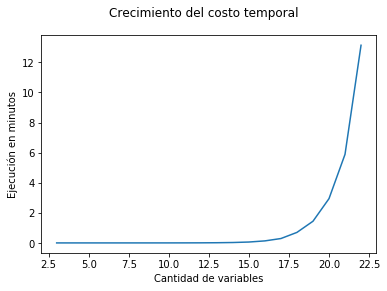

In [7]:
# Leo los resultados y los grafico

results = files.read_result("result_sat_optimo")

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]) / 60)

plot_historic(nodes, times)

In [15]:
n = nodes[-1]
t = times[-1]

print(n, t)

t = round(t, 2)

for i in range(n, 150):

    t *= 2

print(t/60/24/365)

22 13.137651178333336
8.507059173023461e+30
